# Problema tipo 3. 
## Determinación del volumen de un reactor ideal:
## *Reactores de Mezcla Perfecta y Flujo Pistón.*

In [1]:
# %matplotlib inline

%matplotlib notebook
import numpy as np
from scipy import optimize
from scipy.integrate import ode
import matplotlib.pyplot as mpl
import random
import math
import pandas as pd
import IPython.core.display as di
pd.set_option('display.notebook_repr_html', True)
from ipywidgets import interact
import notebook
from IPython.display import clear_output, display, HTML, Image,Math, Latex
from IPython.external import mathjax
FigureSize=(6,5)


def generador_parametros(): #generación de parámetros de la ecuación cinética y Temperatura de trabajo
    global k, Ea, Ln_K0, n, T,Qv,Ca0,Xas
    
    Ea=random.uniform(40.,80.0)
    Ca0=round(random.uniform(5.,10.),1)
    Xas=round(random.uniform(0.5,1.0),2)
    Ln_K0 = random.uniform(15.,25.)
    T= random.uniform(40., 80.) #Temperatura en ºC
    T1=T+273.15 #Temperatura en K
    k = math.exp(Ln_K0)*math.exp(Ea*(-1000.)/(8.31*(T1)))
    n=random.choice([0.5,1,2])   
    Qv=round(random.uniform(50,100),0) #Caudal volumétrico en L/min
    
    return k,n,T,Qv,Ca0,Xas



def Reactor_MP(Qv,n,k,Ca0,Xas): #Cálculo del volumen del rtor MP

    Volumen=Qv*(Ca0*Xas/(((Ca0*(1-Xas))**n)*k))
    return Volumen



def f(Xa,V,n,k,Ca0,Qv): #ecuación cinética

    t_residencia=(Qv)/(k*(Ca0**(n-1))*(1-Xa)**n)
    return t_residencia




def Reactor_FP(Qv,n,k,Ca0,Xas):
       
    incr_Xa=0.005

    V = []
    Xa = []

    Xa0=0.
    V_inicial=0.
    
    V.append(0.)
    Xa.append(0.)

    r = ode(f).set_integrator('vode', method='bdf', nsteps=1000, atol = 1.0e-05, rtol = 1.0e-05)
    r.set_initial_value(V_inicial,Xa0).set_f_params(n,k,Ca0,Qv)
    #print(t[0], Ca[0])
    #print ('r_t: ',r.t,'Ca0: ',r.y)

    while r.successful() and Xa[-1]<=Xas:
        r.integrate(r.t + incr_Xa)
        #Ca[k1]=r.y
        V.append(r.y)
        Xa.append(r.t)
        #print ('tiempo:', '%.2f' % t[k], 'Ca:','%.4f'%Ca[k])


    return V[-1]


display(HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Mostrar código')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Esconder código')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Mostrar código"></form>'''))

display(HTML('<h1 style="color:#C30"><strong>Avanzar para generar datos</strong></h1>'))
display(HTML('<p>Recuerda que una ecuación cinética de tipo potencial\
            tiene la forma:</br>  </p>' ))
display(Math(r'r=k\cdot C_A^n'))



<IPython.core.display.Math object>

In [2]:
display(HTML('<h1 style="color:#C30"><strong>Los datos del sistema son:</strong></h1>'))

k,n,T,Qv,Ca0,Xas=generador_parametros()

valores=[np.round(math.log(k),3),np.round(n,2),np.round(T,1),np.round(Qv,1),np.round(Ca0,2),np.round(Xas,2)]
etiquetas=['Ln k:','n', 'Temperatura (ºC)','Qv (L/min)','Ca0 (mol/L)','Conversión (Xas)']
data = dict(zip(etiquetas, valores))

values = pd.DataFrame(data,index=['Valores'], columns=etiquetas)


display(values)


#print ("Ln k: ",'%.3f' % math.log(k), "; n: ", '%.2f' % n, '; T (ºC): ','%.1f' % T, '; Qv (L/min): ','%.1f' % Qv,
      # '; Ca0 (mol/L): ','%.2f' % Ca0,  '; Xas: ','%.2f' % Xas)

Ln k:  n  Temperatura (ºC)  Qv (L/min)  Ca0 (mol/L)  Conversión (Xas)
Valores  3.334  2              77.2        72.0          6.1              0.73

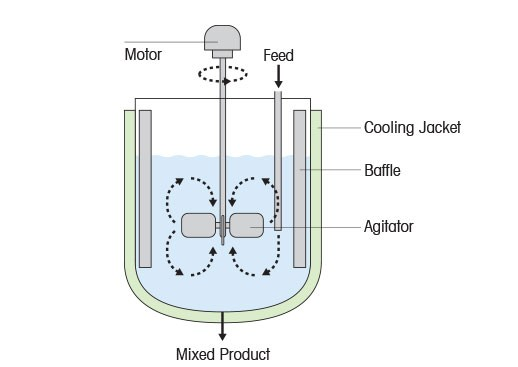

In [3]:
display(HTML('<h1 style="color:#C30"><strong>Reactor Mezcla Perfecta - CSTR (continuous flow stirred-tank reactor) en sus siglas en inglés -. </strong></h1>' ))
display(Image(filename='./Imagenes/Rtor Mezcla Completa.jpeg'));



In [4]:
display(HTML('<h1 style="color:#C30"><strong>La ecuación de diseño de un reactor Mezcla Perfecta es:</br> </strong></h1>' ))
display(Math(r'\frac{V}{Q_V}=\frac{C_A^{entrada} \cdot X_A}{(-R_A)}'))

<IPython.core.display.Math object>

In [5]:
print ('El volumen del reactor Mezcla Perfecta es: ','%.1f' % Reactor_MP(Qv,n,k,Ca0,Xas),' L')

El volumen del reactor Mezcla Perfecta es:  4.2  L


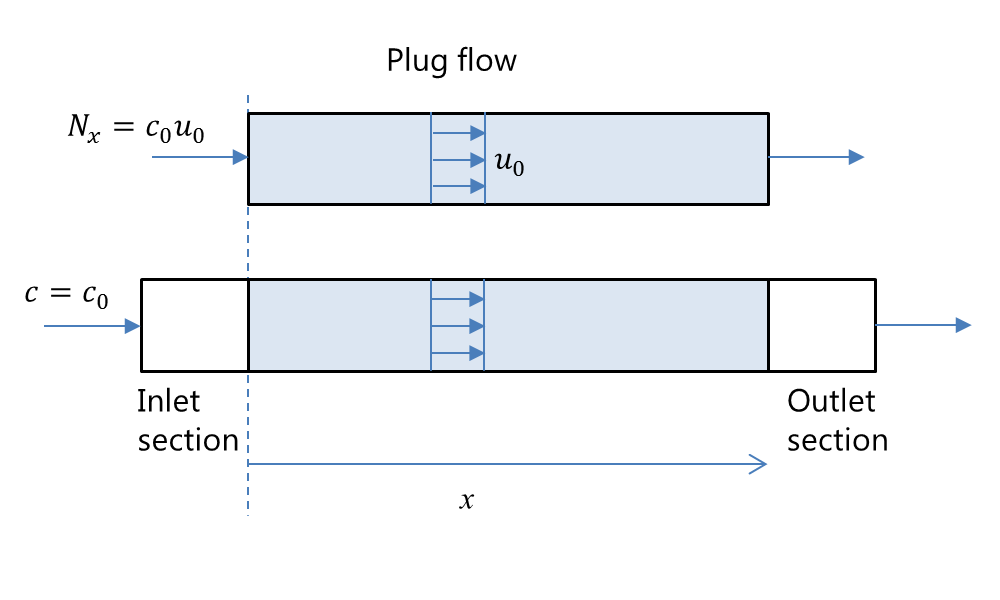

In [6]:
display(HTML('<h1 style="color:#C30"><strong>Reactor Flujo Piston - PFR (Plug flow reactor) en sus siglas en inglés -. </strong></h1>' ))
display(Image(filename='./Imagenes/Rtor flujo piston.png', width=500));

In [7]:
display(HTML('<h1 style="color:#C30"><strong>La ecuación de diseño de un reactor Flujo Pistón es:</br> </strong></h1>' ))
display(Math(r'\frac{dV}{Q_V}=\int_{X_A^{entrada}}^{X_A^{salida}}\frac{C_A^{entrada} \cdot X_A}{(-R_A)}'))

<IPython.core.display.Math object>

In [8]:
print ('El volumen del reactor Flujo Pistón es: ','%.1f' % Reactor_FP(Qv,n,k,Ca0,Xas),' L')

El volumen del reactor Flujo Pistón es:  1.1  L


In [9]:
display(HTML('''

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Programado con Jupyter. </footer>'''))